In [1]:
import time
import sys

In [2]:
def twos_complement(hexstr,bits):
    value = int(hexstr,16)
    if value & (1 << (bits-1)):
        value -= 1 << bits
    return value

def binary_data_loading(file):
    if file == '': return []
    hex_data = open(file, 'rb').read().hex()
    final_data = []
    for base_idx in range(0, len(hex_data), 28):
        row = {
                'hex_str_sec': '',
                'second_epoch_int': 0,
                'second_epoch_twos_complement': 0,
                'hex_str_ms' : '',
                'ms_epoch_int': 0,
                'ms_epoch_twos_complement': 0,
                'x_val': 0,
                'y_val': 0,
                'z_val': 0
                }

        idx = base_idx
        row['hex_str_sec'] = hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]
        row['second_epoch_int'] = int((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + 
                                hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)
        row['second_epoch_twos_complement'] = twos_complement((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + 
                                hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 32)

        idx += 8
        row['hex_str_ms'] = hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]
        row['ms_epoch_int'] = int((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + 
                                hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)
        row['ms_epoch_twos_complement'] = twos_complement((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + 
                                hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 32)
        
        idx += 8
        row['x_val'] = twos_complement((hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        idx += 4
        row['y_val'] = twos_complement((hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        idx += 4
        row['z_val'] = twos_complement((hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        final_data.append(row)

    return final_data

In [4]:
# file1 = 'C:/Users/ankur/OneDrive/Desktop/bib_project/acc_sample_files/1_20230316103628_2120_ACL_1.bin'
file1 = "C:/Users/ankur/OneDrive/Desktop/venv_bib/acc_sample_files/1_20230403133359_2139_ACL_1.bin"

In [5]:
ab = binary_data_loading(file1)

In [6]:
import pandas as pd
abc = pd.DataFrame(ab)

def time_stamp_int(dataframe):
    t_sec = dataframe['second_epoch_int']
    t_micros = dataframe['ms_epoch_int']
    dataframe['time'] = t_sec + t_micros/1000000
    
    return dataframe

In [7]:
# new_df = ts_int.loc[:, ["time", "x_val", "y_val", "z_val"]]
# pd.set_option('display.max_rows', 2000)
abc["x_val"].head(5), abc["y_val"].head(5), abc["z_val"].head(5)

(0     0
 1   -52
 2   -58
 3   -64
 4   -54
 Name: x_val, dtype: int64,
 0      0
 1   -230
 2   -228
 3   -238
 4   -234
 Name: y_val, dtype: int64,
 0     0
 1   -68
 2   -96
 3   -56
 4   -68
 Name: z_val, dtype: int64)

In [8]:
def remove_zero(dataframe):
    x = dataframe["x_val"].to_list()
    for i,item in enumerate(x):
        if item == 0 and i != 0:
            x[i] = x[i-1]

    y = dataframe["y_val"].to_list()
    for i,item in enumerate(y):
        if item == 0 and i != 0:
            y[i] = y[i-1]
    
    z = dataframe["z_val"].to_list()
    for i,item in enumerate(z):
        if item == 0 and i != 0:
            z[i] = z[i-1]

    dataframe["x_val"] = x
    dataframe["y_val"] = y
    dataframe["z_val"] = z

    return dataframe
# return a
# a = abc["x_val"].to_list()
# print(a)
# for i,item in enumerate(a):
#     if item == 0:
#         a[i] = a[i-1]

# abc = remove_zero(abc)


In [19]:
import numpy as np
sampling_rate = 495
time = np.arange(0, len(abc)) / sampling_rate
print(len(time), len(abc))

5906 5906


Text(0.5, 0, 'Time (s)')

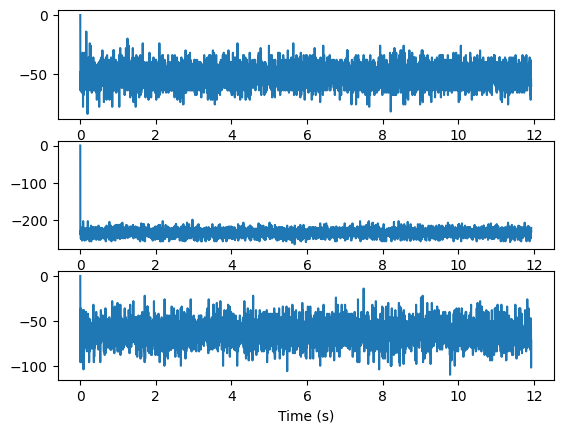

In [21]:
# file1 = 'C:/Users/ankur/OneDrive/Desktop/bib_project/acc_sample_files/1_20230323111906_2131_ACL_1.bin'
file1 = "C:/Users/ankur/OneDrive/Desktop/venv_bib/acc_sample_files/1_20230403133359_2139_ACL_1.bin"
ab = binary_data_loading(file1)
abc = pd.DataFrame(ab)
abc = remove_zero(abc)

sampling_rate = 495
time = np.arange(0, len(abc)) / sampling_rate

a = abc["x_val"]
b = abc["y_val"]
c = abc["z_val"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3)
ax[0].plot(time,a)
ax[1].plot(time,b)
ax[2].plot(time,c)
plt.xlabel('Time (s)')

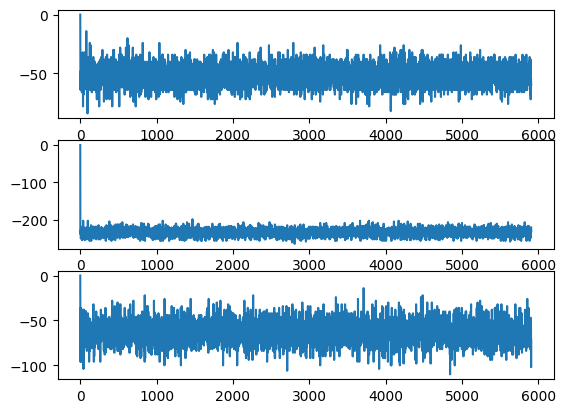

In [12]:
# file1 = 'C:/Users/ankur/OneDrive/Desktop/bib_project/acc_sample_files/1_20230323113427_2133_ACL_1.bin'
file1 = "C:/Users/ankur/OneDrive/Desktop/venv_bib/acc_sample_files/1_20230403133359_2139_ACL_1.bin"
ab = binary_data_loading(file1)
abc = pd.DataFrame(ab)
abc = remove_zero(abc)
a = abc["x_val"]
b = abc["y_val"]
c = abc["z_val"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3)
ax[0].plot(a)
ax[1].plot(b)
ax[2].plot(c)

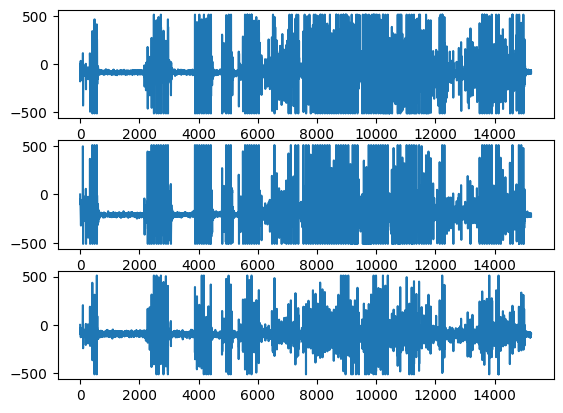

In [81]:
file1 = 'C:/Users/ankur/OneDrive/Desktop/bib_project/acc_sample_files/1_20230323113731_2134_ACL_1.bin'
ab = binary_data_loading(file1)
abc = pd.DataFrame(ab)
abc = remove_zero(abc)
a = abc["x_val"]
b = abc["y_val"]
c = abc["z_val"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3)
ax[0].plot(a)
ax[1].plot(b)
ax[2].plot(c)

In [68]:
# print(abc['x_val']) 
# ts_int = time_stamp_int(abc)
# ts_twos_complement = time_stamp_twos(abc)
# ts_stamp = ts_int["time"]

# for i in ts_stamp:
#     print(str(i))

# time_diff_int = ts_int['time'].max() - ts_int['time'].min() 
# time_diff_twos = ts_twos_complement['time'].max() - ts_twos_complement['time'].min() 

# print(time_diff_int, time_diff_twos)
# print(time_diff_int/60)
# len(ts_int)

# len(ts_int)/time_diff_twos

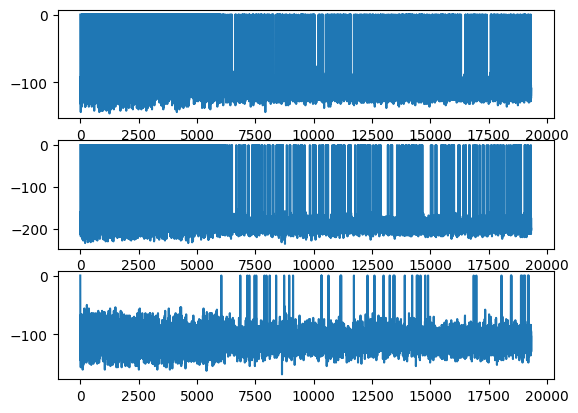

In [13]:
# No movement
file1 = 'C:/Users/ankur/OneDrive/Desktop/bib_project/acc_sample_files/1_20230323111906_2131_ACL_1.bin'
ab = binary_data_loading(file1)
abc = pd.DataFrame(ab)

a = abc["x_val"]
b = abc["y_val"]
c = abc["z_val"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3)
ax[0].plot(a)
ax[1].plot(b)
ax[2].plot(c)

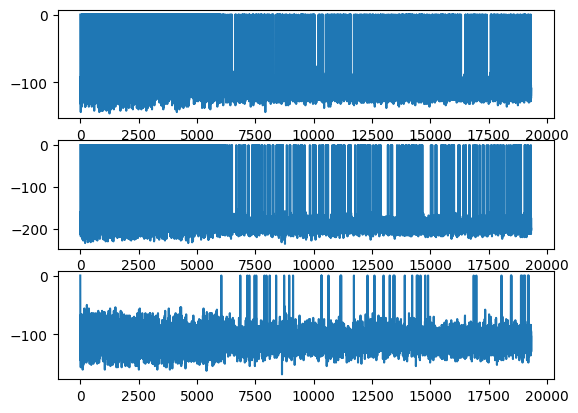

In [14]:
# Movement after 10s interval

file1 = 'C:/Users/ankur/OneDrive/Desktop/bib_project/acc_sample_files/1_20230323111906_2131_ACL_1.bin'
ab = binary_data_loading(file1)
abc = pd.DataFrame(ab)

a = abc["x_val"]
b = abc["y_val"]
c = abc["z_val"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3)
ax[0].plot(a)
ax[1].plot(b)
ax[2].plot(c)

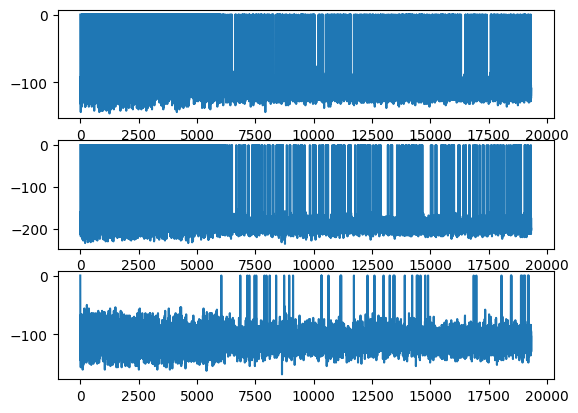

In [16]:
# Continuous movement

file1 = 'C:/Users/ankur/OneDrive/Desktop/bib_project/acc_sample_files/1_20230323111906_2131_ACL_1.bin'
ab = binary_data_loading(file1)
abc = pd.DataFrame(ab)

a = abc["x_val"]
b = abc["y_val"]
c = abc["z_val"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3)
ax[0].plot(a)
ax[1].plot(b)
ax[2].plot(c)

In [69]:
# increment = True

# df = ts_int['time']
# for i in range(1, len(df)):
#     print(df[i])
#     if df[i] < df[i-1]:
#         print(i)
#         increment = False
#         break

# if increment:
#     print('The numbers are in increment.')
# else:
#     print('The numbers are not in increment.')

In [70]:
# 1677773274.404228 - 1677773274.32736

In [71]:
# d = 1/3200

In [72]:
# increment = True

# df = ts_twos_complement['time']
# for i in range(1, len(df)):
#     print(df[i])
#     if df[i] < df[i-1]:
#         print(df[i])
#         increment = False
#         break

# if increment:
#     print('The numbers are in increment.')
# else:
#     print('The numbers are not in increment.')

In [73]:
# ts_twos_complement['time'][2], ts_twos_complement['time'][1]

In [74]:
# 1/3200

In [75]:
# ts_int['time'][0], ts_int['time'][1]

In [76]:
# print(time_diff_int, time_diff_twos)

In [77]:
# def time_stamp_int(dataframe):
#     t_sec = dataframe['second_epoch_int']
#     t_micros = dataframe['ms_epoch_int']
#     dataframe['time'] = t_sec + t_micros/1000000
    
#     return dataframe

# time1 = time_stamp_int(abc)

In [78]:
# time_inst = abc['time']

In [79]:
# ts = 1/3200                  # period
# df = ts_int['time']
# xv = abc['x_val']
# for i in range(1, len(xv)):
#     d2 = df[i] - df[i-1]
#     n_s = round(d2/ts - 1)
# #     if n_s != -1.0:
# #         print(n_s)
#     print(str(df[i]), n_s, xv[i-1])
    
    

In [100]:
# pd.set_option('display.max_rows', 200)

5

In [80]:
# new_df = ts_int.loc[:, ["time", "x_val", "y_val", "z_val"]]
# pd.set_option('display.max_rows', 200)
# new_df.head(200)
# ts = time_stamp(abc)
# ts